# EPA1361 - Model-Based Decision Making
# Week 3 - Sensitivity analysis

This exercise uses the same predator-prey model we used for the multi-model exercise, focusing on the Python version. As with the other exercise, define a model object for the function below, with the uncertainty ranges provided:

|Parameter	|Range or value	        |
|-----------|--------------:|
|prey_birth_rate    	|0.015 – 0.035	|
|predation_rate|0.0005 – 0.003 	|
|predator_efficiency     	|0.001 – 0.004	    |
|predator_loss_rate	    |0.04 – 0.08	    |
|Final time	    |365	    |
|dt	    |0.25	    |



In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from ema_workbench import (Model, RealParameter, TimeSeriesOutcome,
                           perform_experiments, ema_logging,Policy)

from ema_workbench.em_framework.evaluators import Samplers

from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType
from ema_workbench.em_framework.salib_samplers import get_SALib_problem


from problem_formulation import get_model_for_problem_formulation

from SALib.analyze import sobol

C:\Users\ludov\anaconda3\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(


In [2]:
# setting up the model as usual
ema_logging.log_to_stderr(ema_logging.INFO)

dike_model, planning_steps = get_model_for_problem_formulation(0)

* Sensitivity analysis often focuses on the final values of an outcome at the end of the simulation. However, we can also look at metrics that give us additional information about the behavior of the model over time. Using the statsmodel library and an appropriate sampling design, fit a linear regression model for each of the following indicators. What can we conclude about the behavior of the model, and about the importance of the different inputs?

  * The final values of the _prey_ outcome
  * The mean values of the _prey_ outcome over time, within each experiment
  * The standard deviations of the _prey_ outcome over time, within each experiment


In [3]:
n_exp = 100

results_lhs = perform_experiments(dike_model, scenarios=n_exp,
                                  uncertainty_sampling=Samplers.LHS, policies=1)
# we get the experiments in a dataframe and the outcomes in a dictionary
exp_lhs, out_lhs = results_lhs

[MainProcess/INFO] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
100%|████████████████████████████████████████| 100/100 [06:49<00:00,  4.09s/it]
[MainProcess/INFO] experiments finished


In [4]:
exp_lhs #input

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,61,77.501999,1.5,0.519739,298.878014,1.5,0.694108,246.934892,1,0.038065,...,1,4,3,6,1,0,4,1,0,dikesnet
1,89,301.621340,1,0.041235,268.407691,10,0.022622,268.033198,1,0.046642,...,1,4,3,6,1,0,4,2,0,dikesnet
2,46,270.181353,10,0.145014,100.133573,1.5,0.158623,150.762648,1.5,0.792762,...,1,4,3,6,1,0,4,3,0,dikesnet
3,98,263.286213,1,0.621646,111.468068,1,0.592907,148.161629,10,0.813316,...,1,4,3,6,1,0,4,4,0,dikesnet
4,118,210.867979,1.5,0.821175,103.921262,10,0.328401,41.388608,1.5,0.358517,...,1,4,3,6,1,0,4,5,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12,343.810748,1.5,0.726749,36.111461,10,0.750416,54.522380,10,0.369633,...,1,4,3,6,1,0,4,96,0,dikesnet
96,2,84.455601,1.5,0.251423,176.798413,1,0.375944,120.409383,1,0.931069,...,1,4,3,6,1,0,4,97,0,dikesnet
97,124,30.593647,10,0.232034,125.098866,1.5,0.620516,125.357594,10,0.943351,...,1,4,3,6,1,0,4,98,0,dikesnet
98,15,47.872409,10,0.112121,309.233429,1.5,0.810858,197.623552,10,0.892759,...,1,4,3,6,1,0,4,99,0,dikesnet


In [5]:
out_lhs #outcomes

{'All Costs': array([1.95179738e+09, 1.96866770e+09, 1.94911257e+09, 1.95025497e+09,
        1.95032189e+09, 1.94926280e+09, 1.94853607e+09, 1.94925836e+09,
        1.95651267e+09, 1.94879985e+09, 1.94826431e+09, 1.94868732e+09,
        1.94853663e+09, 1.94826431e+09, 1.94826431e+09, 1.95478589e+09,
        1.94854065e+09, 1.94826431e+09, 1.94826431e+09, 1.94826431e+09,
        1.94826431e+09, 1.94929263e+09, 2.01921400e+09, 1.94985555e+09,
        1.94948555e+09, 1.95061339e+09, 1.97001889e+09, 1.97249563e+09,
        2.01454263e+09, 1.94880489e+09, 1.99879523e+09, 1.94931537e+09,
        1.95410393e+09, 1.94961581e+09, 1.95937365e+09, 1.94867622e+09,
        1.94826431e+09, 1.94908554e+09, 1.96452290e+09, 2.18471711e+09,
        1.94826431e+09, 1.94858524e+09, 1.94895238e+09, 1.94860413e+09,
        1.95079120e+09, 1.94977929e+09, 1.95673916e+09, 1.94868534e+09,
        1.95114182e+09, 1.96202900e+09, 1.94879757e+09, 1.94894094e+09,
        1.94826431e+09, 1.95272756e+09, 1.96869075e

In [6]:
out_lhs['All Costs'].shape  # this array contains the results of the outcome variable in the different scenarios

(100,)

For each of the sampling methods, we can then select outcomes of interest: the final values of the prey variable, the mean of the prey variable over time within each experiment, and the standard deviation of the same variable across time (again in each experiment).

In [7]:
costs_lhs = out_lhs['All Costs']

<font color= blue>We can't compute the mean and std as they did because our results don't have the same shape as the ones they get</a>

As an example, we can first fit a linear regression model to the prey_final_lhs outcome. We first drop the 'model' and 'policy' columns from the experiments, which were not used in this example. The add_constant method can be used to add an intercept to the regression model.

In [8]:
import statsmodels.api as sm

X = pd.DataFrame(exp_lhs).drop(['model','policy'], inplace=False, axis=1)
X_0 = sm.add_constant(X)

est = sm.OLS(costs_lhs, X_0.astype(float)).fit()
print(est.summary())
print(est.params)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     2.029
Date:                Thu, 26 May 2022   Prob (F-statistic):             0.0143
Time:                        19:16:00   Log-Likelihood:                -1827.9
No. Observations:                 100   AIC:                             3698.
Df Residuals:                      79   BIC:                             3753.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
A.0_ID flood wave shape -7

## Sobol

In this case, the linear regression clearly isn't capturing most of the output variance (as shown by the R2 value). We can therefore use the Sobol results with the SALib analysis functions for a more comprehensive analysis. We first use the get_SALib_problem to convert the uncertainties we have previously defined, to a dictionary which is compatible with SALib. This includes the names and bounds of the uncertainties.



* Perform an appropriate number of experiments with the Sobol sampling functionality included in the Workbench, then analyze the results with SALib for the same three indicators. How can we interpret the first-order and total indices? Does your chosen sample size give a stable estimation of the indices? You'll need to use the [get_SALib_problem](https://emaworkbench.readthedocs.io/en/latest/ema_documentation/em_framework/salib_samplers.html) function to convert your Workbench experiments to a problem definition that you can pass to the SALib analysis function. 

Note that the Sobol analysis will require N(2k+2) samples, where N is a baseline number of experiments required to cover the uncertainties (let's also assume 1000 in this case) and k is the number of uncertainties. We have k = 4 uncertainties, so we'll have 1000 * (8 + 2) = 10,000 experiments in total. We can choose the sampling by specifying the uncertainty_sampling argument; note that the Sobol sampler automatically adjusts the number of experiments based on the number of uncertainties and the specified value of N.

In [9]:
dike_model.uncertainties

In [10]:
problem = get_SALib_problem(dike_model.uncertainties)
print(problem)

{'num_vars': 19, 'names': ['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1', 'discount rate 2'], 'bounds': [(0, 133), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (0, 4), (0, 4), (0, 4)]}


We can then pass the problem and the outcome values (using the results with the Sobol sample, instead of the LHS sample) to the SALib analysis function. By default, the Sobol sampler calculates second-order interaction effects between each pair of variables.

In [13]:
n_exp = 5

experiments_sobol, outcomes_sobol = perform_experiments(dike_model, scenarios=n_exp,
                                                        uncertainty_sampling=Samplers.SOBOL)

C:\Users\ludov\anaconda3\lib\site-packages\SALib\sample\saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (5) is equal to `2^n`.
        
  warnings.warn(msg)
[MainProcess/INFO] performing 200 scenarios * 1 policies * 1 model(s) = 200 experiments


  0%|                                                  | 0/200 [00:00<?, ?it/s][MainProcess/INFO] performing experiments sequentially


  0%|▏                                         | 1/200 [00:04<13:51,  4.18s/it]

  1%|▍                                         | 2/200 [00:08<13:50,  4.19s/it]

  2%|▋                                         | 3/200 [00:12<13:37,  4.15s/it]

  2%|▊                                         | 4/200 [00:16<13:28,  4.13s/it]

  2%|█                                         | 5/200 [00:20<13:14,  4.08s/it]

  3%|█▎                                        | 6/200 [00:24<13:14,  4.09s/it]

  4%|█▍                                        | 7/200 [00:29<13:4

In [14]:
outcomes_sobol

{'All Costs': array([1.67209433e+09, 1.73666236e+09, 1.67209433e+09, 1.67209433e+09,
        1.71097292e+09, 1.67209433e+09, 1.67209433e+09, 1.93228341e+09,
        1.97295932e+09, 1.66809739e+09, 1.63114181e+09, 1.67209433e+09,
        1.67209433e+09, 1.67209433e+09, 1.67209433e+09, 1.67209433e+09,
        1.62362197e+09, 1.67209433e+09, 1.80753055e+09, 2.10093668e+09,
        1.99638557e+09, 1.88932843e+09, 1.88932843e+09, 1.84537238e+09,
        1.89952874e+09, 1.88932843e+09, 1.60118704e+09, 1.88932843e+09,
        1.88932843e+09, 2.48359258e+09, 1.88932843e+09, 1.88932843e+09,
        1.88633812e+09, 1.88932843e+09, 1.88932843e+09, 2.42696882e+09,
        1.88932843e+09, 1.77781075e+09, 1.53622122e+09, 1.88932843e+09,
        3.07678000e+09, 3.10535613e+09, 3.90935550e+09, 3.07678000e+09,
        3.07678000e+09, 3.07678000e+09, 3.07678000e+09, 3.04085874e+09,
        3.07678000e+09, 3.07678000e+09, 3.07678000e+09, 3.07678000e+09,
        3.07678000e+09, 3.07678000e+09, 3.07678000e

In [15]:
costs_sobol = outcomes_sobol['All Costs']
costs_sobol.shape

(200,)

In [16]:
Si = sobol.analyze(problem, costs_sobol, calc_second_order=True, print_to_console=True)

                                   ST       ST_conf
A.0_ID flood wave shape  2.199398e-03  1.202510e-02
A.1_Bmax                 1.210556e-01  3.352621e-01
A.1_Brate                0.000000e+00  0.000000e+00
A.1_pfail                1.313437e+00  2.841307e+00
A.2_Bmax                 1.699033e-07  3.886889e-07
A.2_Brate                1.699033e-07  3.886889e-07
A.2_pfail                1.258841e-02  1.302872e-01
A.3_Bmax                 1.573705e-02  1.721185e-01
A.3_Brate                2.777383e-06  3.037666e-05
A.3_pfail                5.226816e-01  1.360721e+00
A.4_Bmax                 0.000000e+00  0.000000e+00
A.4_Brate                0.000000e+00  0.000000e+00
A.4_pfail                8.118294e-03  1.850128e-02
A.5_Bmax                 0.000000e+00  0.000000e+00
A.5_Brate                0.000000e+00  0.000000e+00
A.5_pfail                1.622646e-02  3.612873e-02
discount rate 0          5.336528e-03  1.414862e-02
discount rate 1          7.357463e-02  1.415614e-01
discount rat

The SALib analysis returns a dictionary with keys for the different relevant indicators (e.g. S1 and ST for first-order and total effects). The values are in the same order as the names of the problem dictionary, and indicate the fraction of total output variance corresponding to each of the indices (so that, for example, the predator_efficiency variable contributes approximately 40% of variance on its own, or over 80% when including interactions with other inputs). We can quickly visualize the first-order and total effects as well as their confidence intervals, by converting the results to a DataFrame:

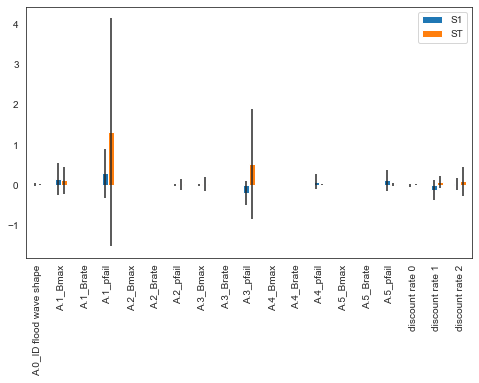

In [17]:
Si_filter = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter, index=problem['names'])

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.show()

We can also study the convergence of the Sobol indices as a function of the number of samples, by computing the indices over a partial sample:

In [22]:
Y = costs_sobol

s_data = pd.DataFrame(index=problem['names'],
                      columns=np.arange(3,n_exp,3)*(2*problem['num_vars']+2))
for j in s_data.columns:
    scores = sobol.analyze(problem, Y[0:j], calc_second_order=True, print_to_console=False)
    s_data.loc[:,j] = scores['ST']

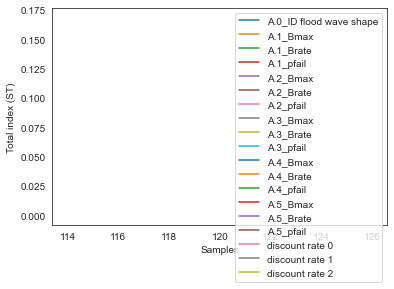

In [23]:
fig, ax = plt.subplots(1)

s_data.T.plot(ax=ax)
ax.set_xlabel('Samples')
ax.set_ylabel('Total index (ST)')
plt.show()

## Extra trees

* Use the [Extra-Trees analysis](https://emaworkbench.readthedocs.io/en/latest/ema_documentation/analysis/feature_scoring.html) included in the Workbench to approximate the Sobol total indices, with a suitable sampling design. As a starting point, use an ensemble of 100 trees and a max_features parameter of 0.6, and set the analysis to regression mode. Are the estimated importances stable relative to the sample size and the analysis parameters? How do the results compare to the Sobol indices?

In [24]:
from ema_workbench.analysis import feature_scoring

In [25]:
costs_sobol = outcomes_sobol['All Costs']

In [26]:
scores = feature_scoring.get_ex_feature_scores(experiments_sobol, costs_sobol,
                                      max_features=0.6, mode=RuleInductionType.REGRESSION)[0]
scores

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


,1
0,
A.1_pfail,0.244219
A.1_Brate,0.189771
discount rate 0,0.117653
A.3_pfail,0.069036
A.4_Brate,0.052152
A.0_ID flood wave shape,0.046340
A.4_Bmax,0.043796
A.1_Bmax,0.038995
discount rate 2,0.031121


In [30]:
experiments_sobol.shape[0]

200

In [31]:
combined_scores = []
for j in range(100, experiments_sobol.shape[0], 10):
    scores = feature_scoring.get_ex_feature_scores(experiments_sobol.iloc[0:j, :],
                                                   costs_sobol[0:j],
                                                   max_features=0.6,
                                                   mode=RuleInductionType.REGRESSION)[0]
    scores.columns = [j]
    combined_scores.append(scores)

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because on

In [32]:
combined_scores = pd.concat(combined_scores, axis=1, sort=True)

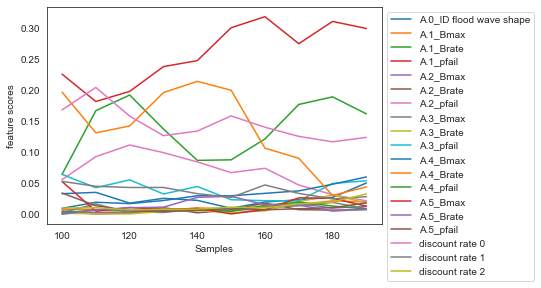

In [33]:
fig, ax = plt.subplots(1)

combined_scores.T.plot(ax=ax)
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlabel('Samples')
ax.set_ylabel('feature scores')
plt.show()

<font color=blue>Values are not converging lol</font>